In [1]:

import tensorflow as tf
import numpy as np 
from sklearn import datasets 
iris = datasets.load_iris()

In [2]:
ds1 = tf.data.Dataset.from_tensor_slices((iris['data'], iris['target']))
for feature, label in ds1.take(5):
    tf.print(feature, label)

[5.1 3.5 1.4 0.2] 0
[4.9 3 1.4 0.2] 0
[4.7 3.2 1.3 0.2] 0
[4.6 3.1 1.5 0.2] 0
[5 3.6 1.4 0.2] 0


In [3]:
import pandas as pd

In [11]:
pdf = pd.DataFrame(iris['data'], columns=iris.feature_names)

In [12]:
pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
ds2 = tf.data.Dataset.from_tensor_slices((pdf.to_dict('list'), iris['target']))

In [14]:
for feature, label in ds2.take(5):
    tf.print(feature, label)

{'petal length (cm)': 1.4,
 'petal width (cm)': 0.2,
 'sepal length (cm)': 5.1,
 'sepal width (cm)': 3.5} 0
{'petal length (cm)': 1.4,
 'petal width (cm)': 0.2,
 'sepal length (cm)': 4.9,
 'sepal width (cm)': 3} 0
{'petal length (cm)': 1.3,
 'petal width (cm)': 0.2,
 'sepal length (cm)': 4.7,
 'sepal width (cm)': 3.2} 0
{'petal length (cm)': 1.5,
 'petal width (cm)': 0.2,
 'sepal length (cm)': 4.6,
 'sepal width (cm)': 3.1} 0
{'petal length (cm)': 1.4,
 'petal width (cm)': 0.2,
 'sepal length (cm)': 5,
 'sepal width (cm)': 3.6} 0


In [15]:
# 从Python generator构建数据管道
import tensorflow as tf
from matplotlib import pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
image_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory('./data/cifar2/test/', 
                                                        target_size=(32,32),
                                                       batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
len(image_generator)

100

In [18]:
classdict = image_generator.class_indices

In [19]:
classdict

{'airplane': 0, 'automobile': 1}

In [20]:
def gen_imge():
    for feature, label in image_generator:
        yield (feature, label)

In [21]:
df3 = tf.data.Dataset.from_generator(gen_imge, output_types=(tf.float32, tf.int32))

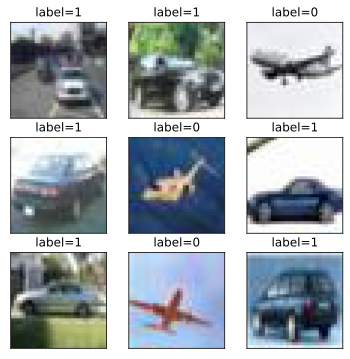

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(6, 6))
for i, (imge, label) in enumerate(df3.unbatch().take(9)):
    ax = plt.subplot(3,3,i+1)
    ax.imshow(imge.numpy())
    ax.set_title('label=%d'% label)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


In [26]:
ds4 = tf.data.experimental.make_csv_dataset(
    file_pattern=['./data/titanic/train.csv', './data/titanic/test.csv'],
    batch_size=3,
    label_name='Survived',
    na_value="",
    num_epochs=1,
    ignore_errors=True,
)

In [27]:
for data, label in ds4.take(2):
    tf.print(data, label)

OrderedDict([('PassengerId', [35 18 31]),
             ('Pclass', ["C83" "" ""]),
             ('Name', ["S" "S" "S"]),
             ('Sex', [83.475 8.3 7.8542]),
             ('Age', ["Harris, Mrs. Henry Birkhardt (Irene Wallach)" "Allum, Mr. Owen George" "Olsson, Miss. Elina"]),
             ('SibSp', [0 0 0]),
             ('Parch', [231 835 397]),
             ('Ticket', [1 3 3]),
             ('Fare', ["female" "male" "female"]),
             ('Cabin', [1 0 0]),
             ('Embarked', ["36973" "2223" "350407"])]) [1 0 0]
OrderedDict([('PassengerId', [24 2 0]),
             ('Pclass', ["" "" ""]),
             ('Name', ["S" "S" "C"]),
             ('Sex', [8.05 27.9 7.225]),
             ('Age', ["Celotti, Mr. Francesco" "Skoog, Miss. Margit Elizabeth" "Lahoud, Mr. Sarkis"]),
             ('SibSp', [0 2 0]),
             ('Parch', [90 643 523]),
             ('Ticket', [3 3 3]),
             ('Fare', ["male" "female" "male"]),
             ('Cabin', [0 3 0]),
             ('Emba

In [28]:
ds5 = tf.data.TextLineDataset(filenames=['./data/titanic/train.csv', './data/titanic/test.csv']).skip(1)

In [29]:
ds5.take(5)

<TakeDataset shapes: (), types: tf.string>

In [34]:
for index, _ in enumerate(ds5.take(5)):
    tf.print(index)

0
1
2
3
4


In [35]:
ds6 = tf.data.Dataset.list_files('./data/cifar2/train/*/*.jpg')
for f in ds6.take(5):
    tf.print(f)

./data/cifar2/train/airplane/2709.jpg
./data/cifar2/train/airplane/3593.jpg
./data/cifar2/train/airplane/2506.jpg
./data/cifar2/train/automobile/556.jpg
./data/cifar2/train/airplane/1050.jpg


In [36]:
def load_img(imgpath, size=(32, 32)):
    label = 1 if tf.strings.regex_full_match(imgpath, '.*/automobile/.*') else 0
    img = tf.io.read_file(imgpath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, size)
    return (img, label)

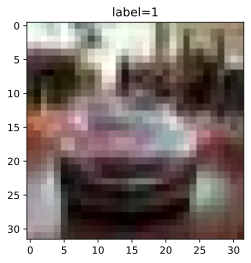

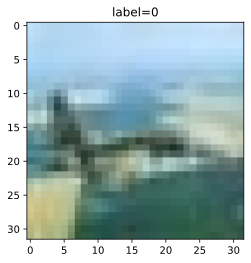

In [39]:
for i, (img, label) in enumerate(ds6.map(load_img).take(2)):
    plt.figure(i)
    plt.imshow((img/255.0).numpy())
    plt.title('label=%d'% label)
    
    

In [40]:
import os

In [43]:
def create_tfrecords(inpath, outpath):
    write = tf.io.TFRecordWriter(outpath)
    dirs = os.listdir(inpath)
    for index, name in enumerate(dirs):
        class_path = inpath + '/' + name + '/'
        for img_name in os.listdir(class_path):
            img_path = class_path + img_name
            img = tf.io.read_file(img_path)
            
            example = tf.train.Example(
                features = tf.train.features(
                    feature = {
                        'label':tf.train.Feature(int64_list = tf.train.Int64List(value=[index])),
                        'img_raw': tf.train.Feature(bytes_list = tf.train.BytesList(value=[img.numpy()]))    
                    }
                )
            )
    write.close()
            
            
            

In [ ]:
create_tfrecords('./data/cifar2/test/', './data/cifar2_test.tfrecords/')

In [44]:
# inpath：原始数据路径 outpath:TFRecord文件输出路径
def create_tfrecords(inpath,outpath): 
    writer = tf.io.TFRecordWriter(outpath)
    dirs = os.listdir(inpath)
    for index, name in enumerate(dirs):
        class_path = inpath +"/"+ name+"/"
        for img_name in os.listdir(class_path):
            img_path = class_path + img_name
            img = tf.io.read_file(img_path)
            #img = tf.image.decode_image(img)
            #img = tf.image.encode_jpeg(img) #统一成jpeg格式压缩
            example = tf.train.Example(
               features=tf.train.Features(feature={
                    'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img.numpy()]))
               }))
            writer.write(example.SerializeToString())
    writer.close()
    
create_tfrecords("./data/cifar2/test/","./data/cifar2_test.tfrecords/")

In [45]:
def parse_example(proto):
    des = {
        'img_raw': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(proto, des)
    img = tf.image.decode_jpeg(example['img_raw'])
    img = tf.image.resize(img, size=(32, 32))
    label = example['label']
    return (img, label)

In [46]:
ds7 = tf.data.TFRecordDataset('./data/cifar2_test.tfrecords').map(parse_example).shuffle(3000)


In [47]:
ds7

<ShuffleDataset shapes: ((32, 32, None), ()), types: (tf.float32, tf.int64)>

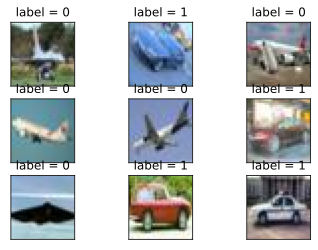

In [50]:
for i, (img, label) in enumerate(ds7.take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow((img/255.0).numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

In [52]:
ds_1 = tf.data.Dataset.from_tensor_slices(tensors=['hello world', 'hi baby', 'you are beautiful'])

In [55]:
ds_1_1 = ds_1.map(lambda x: tf.strings.split(x, ' '))
for i in ds_1_1:
    tf.print(i)

["hello" "world"]
["hi" "baby"]
["you" "are" "beautiful"]


In [57]:
ds_1_2 = ds_1.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for i in ds_1_2:
    tf.print(i)

hello
world
hi
baby
you
are
beautiful


In [59]:
ds_11 = ds_1.filter(lambda x:tf.strings.regex_full_match(x, '.*[a|b].*'))
for i in ds_11:
    tf.print(i)

hi baby
you are beautiful


In [60]:
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds3 = tf.data.Dataset.range(6,9)
ds_zip = tf.data.Dataset.zip((ds1,ds2,ds3))
for x,y,z in ds_zip:
    print(x.numpy(),y.numpy(),z.numpy())

0 3 6
1 4 7
2 5 8


In [62]:
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds_zip = tf.data.Dataset.zip((ds1,ds2))
for x,y in ds_zip:
    print(x.numpy(),y.numpy())

0 3
1 4
2 5


In [67]:
tf.print(ds1)

<RangeDataset shapes: (), types: tf.int64>


In [68]:
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds_concat = tf.data.Dataset.concatenate(ds1,ds2)
for x in ds_concat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)


In [69]:
ds_concat

<ConcatenateDataset shapes: (), types: tf.int64>

In [70]:
ds = tf.data.Dataset.from_tensor_slices([1,2,3,4,5.0])
result = ds.reduce(0.0,lambda x,y:tf.add(x,y))
tf.print(result)

15


In [71]:

ds = tf.data.Dataset.range(12)
ds_batch = ds.batch(4)
for x in ds_batch:
    print(x)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)


In [72]:
elements = [[1, 2],[3, 4, 5],[6, 7],[8]]
ds = tf.data.Dataset.from_generator(lambda: iter(elements), tf.int32)

ds_padded_batch = ds.padded_batch(2,padded_shapes = [4,])
for x in ds_padded_batch:
    print(x)    

tf.Tensor(
[[1 2 0 0]
 [3 4 5 0]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[6 7 0 0]
 [8 0 0 0]], shape=(2, 4), dtype=int32)


In [75]:
pds = tf.data.Dataset.range(12)
ds_w = pds.window(3, shift=1).flat_map(lambda x:x.batch(3, drop_remainder=True))
for i in ds_w:
    tf.print(i)
ds_w

[0 1 2]
[1 2 3]
[2 3 4]
[3 4 5]
[4 5 6]
[5 6 7]
[6 7 8]
[7 8 9]
[8 9 10]
[9 10 11]


<FlatMapDataset shapes: (3,), types: tf.int64>

In [76]:
ds = tf.data.Dataset.range(12)
ds_shuffle = ds.shuffle(buffer_size = 5)
for x in ds_shuffle:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)


In [77]:
ds = tf.data.Dataset.range(3)
ds_repeat = ds.repeat(3)
for x in ds_repeat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [78]:
ds = tf.data.Dataset.range(12)
ds_shard = ds.shard(3,index = 1)

for x in ds_shard:
    print(x)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)


In [79]:
ds = tf.data.Dataset.range(12)
ds_take = ds.take(3)

list(ds_take.as_numpy_iterator())

[0, 1, 2]

In [80]:
list(ds_take.as_numpy_iterator())

[0, 1, 2]

In [81]:
list(ds_shard.as_numpy_iterator())

[1, 4, 7, 10]

In [82]:
@tf.function
def printbar():
    ts = tf.timestamp()
    today_ts = ts%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8,end = "")
    tf.print(timestring)

In [83]:
import time

# 数据准备和参数迭代两个过程默认情况下是串行的。

# 模拟数据准备
def generator():
    for i in range(10):
        #假设每次准备数据需要2s
        time.sleep(2) 
        yield i 
ds = tf.data.Dataset.from_generator(generator,output_types = (tf.int32))

# 模拟参数迭代
def train_step():
    #假设每一步训练需要1s
    time.sleep(1) 
    

In [84]:
# 训练过程预计耗时 10*2+10*1 = 30s
printbar()
tf.print(tf.constant("start training..."))
for x in ds:
    train_step()  
printbar()
tf.print(tf.constant("end training..."))

================================================================================17:37:49
start training...
================================================================================17:38:19
end training...


In [85]:
# 使用 prefetch 方法让数据准备和参数迭代两个过程相互并行。

# 训练过程预计耗时 max(10*2,10*1) = 20s
printbar()
tf.print(tf.constant("start training with prefetch..."))

# tf.data.experimental.AUTOTUNE 可以让程序自动选择合适的参数
for x in ds.prefetch(buffer_size = tf.data.experimental.AUTOTUNE):
    train_step()  
    
printbar()
tf.print(tf.constant("end training..."))

================================================================================17:38:51
start training with prefetch...
================================================================================17:39:12
end training...


In [86]:
ds_files = tf.data.Dataset.list_files("./data/titanic/*.csv")
ds = ds_files.flat_map(lambda x:tf.data.TextLineDataset(x).skip(1))
for line in ds.take(4):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)


In [87]:
ds_files = tf.data.Dataset.list_files("./data/titanic/*.csv")
ds = ds_files.interleave(lambda x:tf.data.TextLineDataset(x).skip(1))
for line in ds.take(8):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'181,0,3,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,69.55,,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,,S', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C', shape=(), dtype=string)


In [88]:
ds = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg")
def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #注意此处为jpeg格式
    img = tf.image.resize(img,size)
    return(img,label)

In [89]:
#单进程转换
printbar()
tf.print(tf.constant("start transformation..."))

ds_map = ds.map(load_image)
for _ in ds_map:
    pass

printbar()
tf.print(tf.constant("end transformation..."))

================================================================================18:42:03
start transformation...
================================================================================18:42:07
end transformation...


In [90]:
#多进程转换
printbar()
tf.print(tf.constant("start parallel transformation..."))

ds_map_parallel = ds.map(load_image,num_parallel_calls = tf.data.experimental.AUTOTUNE)
for _ in ds_map_parallel:
    pass

printbar()
tf.print(tf.constant("end parallel transformation..."))

================================================================================18:42:29
start parallel transformation...
================================================================================18:42:30
end parallel transformation...
